In [5]:
import numpy as np
from fast_gp import GP
from concurrent.futures import ALL_COMPLETED, ProcessPoolExecutor, wait
import json
figsize=(15,7)

In [6]:
with open('datasets/datasets/synth1/synth1-train.csv', 'r') as f:
    data = np.loadtxt(f, delimiter=",")
with open('datasets/datasets/synth1/synth1-test.csv', 'r') as f:
    test = np.loadtxt(f, delimiter=",")

In [7]:
def test_func(data, popsize, mutation_rate, tournament_size, phi, generations, test, elitist_operators):
    g = GP(data, popsize, mutation_rate, 2, 7, tournament_size, generations, phi, 5, elitist_operators)
    var = g.start(test)
    return var

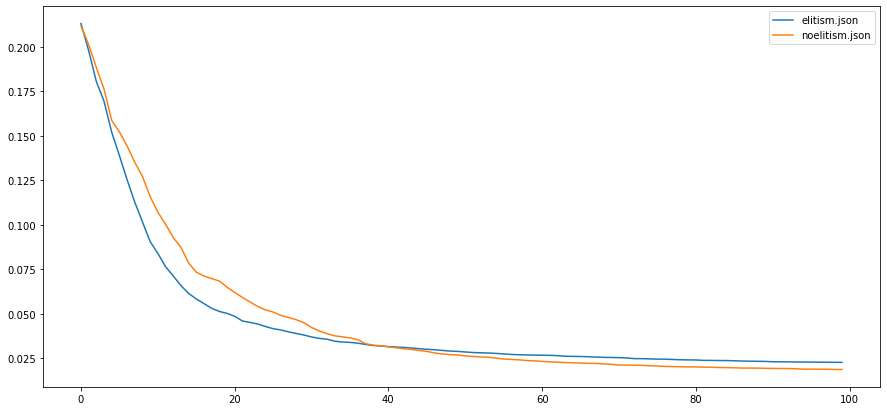

In [8]:
import os
import matplotlib.pyplot as plt

filedir = 'tests/elitism'
div = {}

for filename in os.listdir(filedir):
    div_list = []
    with open(os.path.join(filedir, filename), 'r') as f:
        testfile = json.load(f)
        for test_result in testfile:
            diversity = map(lambda x: x["best"],test_result["iteration"])
            div_list.append(list(diversity))
    div[filename] = np.mean(np.array(div_list), axis=0)
plt.figure(figsize=figsize)
for key, means in div.items():
    plt.plot(means, label=key)
    
plt.legend()

In [9]:
import os
filedir = 'tests/elitism'
div = {}

for filename in os.listdir(filedir):
    div_list = []
    with open(os.path.join(filedir, filename), 'r') as f:
        testfile = json.load(f)
        for test_result in testfile:
            diversity = map(lambda x: x["diversity"],test_result["iteration"])
            div_list.append(list(diversity))
    div[filename] = np.mean(np.array(div_list), axis=0)

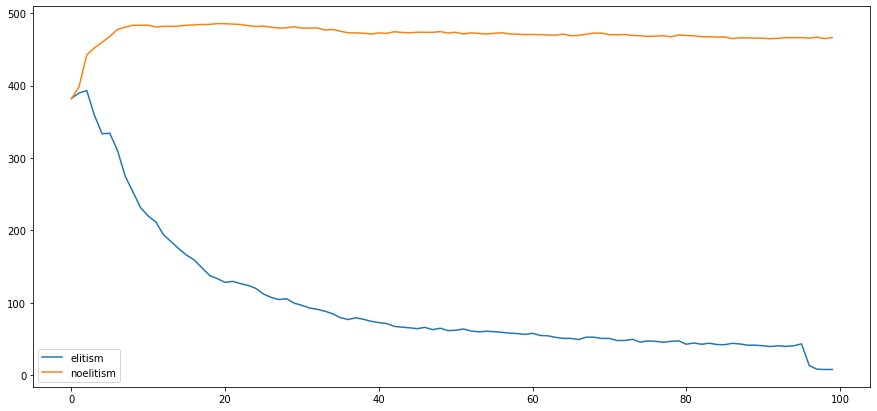

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=figsize)
for key, means in div.items():
    plt.plot(means, label=key[:-5])
    
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


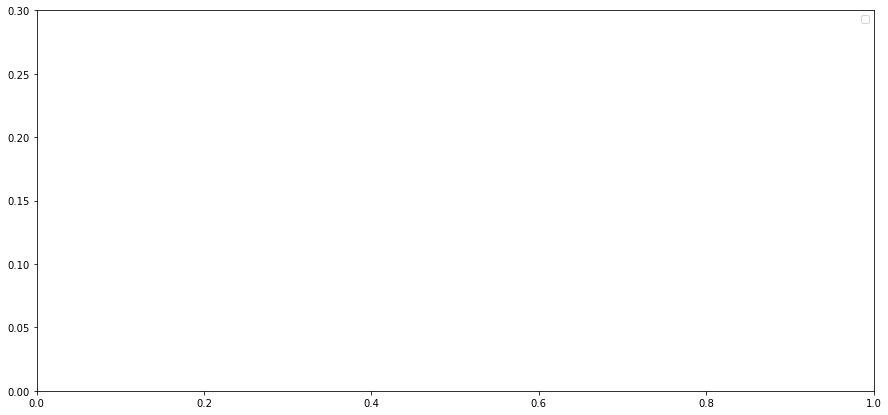

In [11]:
filedir = 'tests/initialv2'
div = {}

for filename in os.listdir(filedir):
    div_list = []
    with open(os.path.join(filedir, filename), 'r') as f:
        testfile = json.load(f)
        for test_result in testfile:
            diversity = map(lambda x: x["test"],test_result["iteration"])
            div_list.append(list(diversity))
    div[filename] = np.mean(np.array(div_list), axis=0)
plt.figure(figsize=figsize)
for key, means in div.items():
    plt.plot(means, label=key[:-5] if key[:-5] != "0" else "NRMSE")

plt.ylim(0, 0.3)
plt.legend()

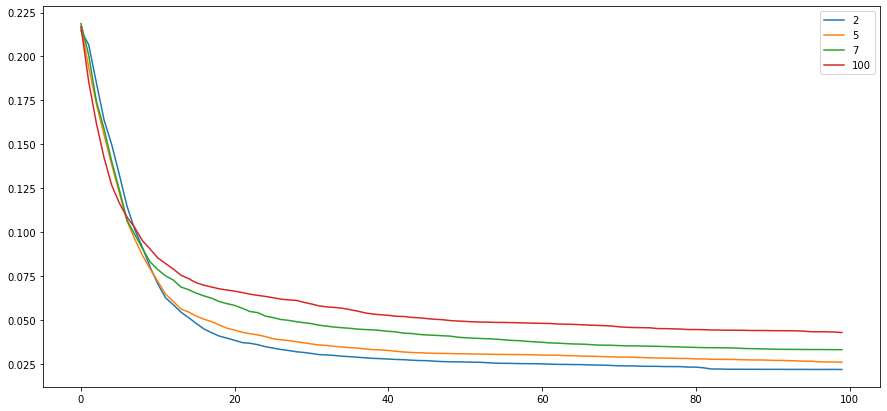

In [12]:
filedir = 'tests/tournament'
div = {}

for filename in os.listdir(filedir):
    div_list = []
    with open(os.path.join(filedir, filename), 'r') as f:
        testfile = json.load(f)
        for test_result in testfile:
            diversity = map(lambda x: x["best"],test_result["iteration"])
            div_list.append(list(diversity))
    div[filename] = np.mean(np.array(div_list), axis=0)
plt.figure(figsize=figsize)
for key, means in div.items():
    plt.plot(means, label=key[:-5])
    
plt.legend()

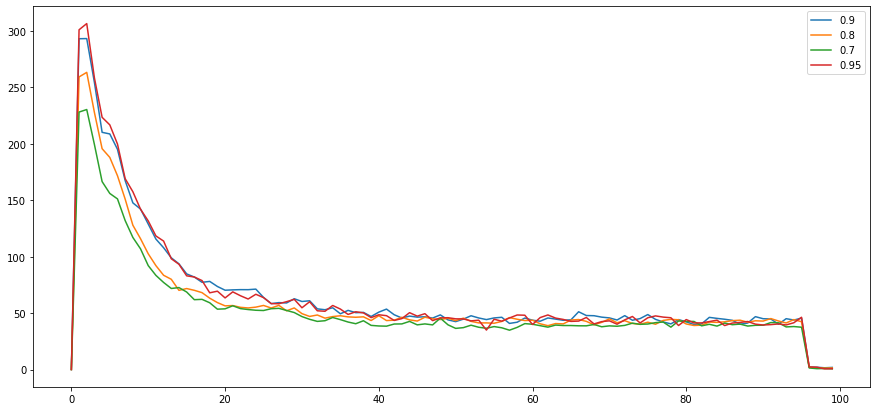

In [13]:
filedir = 'tests/muts'
div = {}

for filename in os.listdir(filedir):
    div_list = []
    with open(os.path.join(filedir, filename), 'r') as f:
        testfile = json.load(f)
        for test_result in testfile:
            diversity = map(lambda x: x["better_child"],test_result["iteration"])
            div_list.append(list(diversity))
    div[filename] = np.mean(np.array(div_list), axis=0)
plt.figure(figsize=figsize)
for key, means in div.items():
    plt.plot(means, label=str(1 - float(key[:-5])))
    
plt.legend()

(0.0, 0.25)

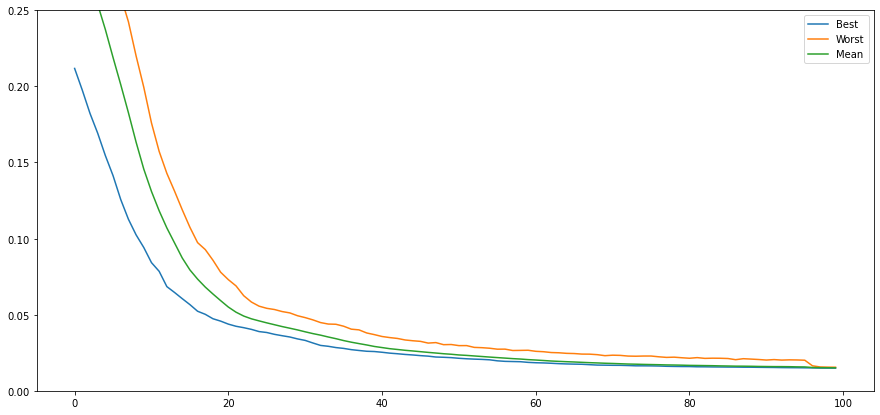

In [14]:
filedir = 'tests/final'
plots = {}

best = []
worst = []
mean = []
test = []
with open(os.path.join(filedir, "synth1.json"), 'r') as f:
    testfile = json.load(f)
    for test_result in testfile:
        b = map(lambda x: x["best"],test_result["iteration"])
        w = map(lambda x: x["worst"],test_result["iteration"])
        m = map(lambda x: x["mean"],test_result["iteration"])
        #t = map(lambda x: x["test"],test_result["iteration"])

        best.append(list(b))
        worst.append(list(w))
        mean.append(list(m))
        #test.append(list(t))

plots["best"] = np.mean(np.array(best), axis=0)
plots["worst"] = np.mean(np.array(worst), axis=0)
plots["mean"] = np.mean(np.array(mean), axis=0)
#plots.append(np.mean(np.array(test), axis=0))


plt.figure(figsize=figsize)
for label, plot in plots.items():
    plt.plot(plot, label=label.capitalize())

plt.legend()
plt.ylim(0, 0.25)
    

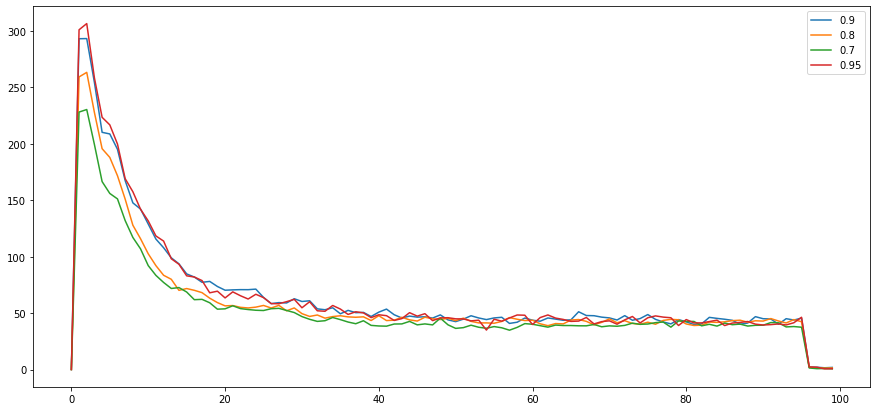

In [16]:
import os
import matplotlib.pyplot as plt
import json
import numpy as np

filedir = 'tests/muts'
div = {}

for filename in os.listdir(filedir):
    div_list = []
    with open(os.path.join(filedir, filename), 'r') as f:
        testfile = json.load(f)
        for test_result in testfile:
            diversity = map(lambda x: x["better_child"],test_result["iteration"])
            div_list.append(list(diversity))
    div[filename] = np.mean(np.array(div_list), axis=0)
plt.figure(figsize=figsize)
for key, means in div.items():
    plt.plot(means, label=str(1- float(key[:-5])))
    
plt.legend()

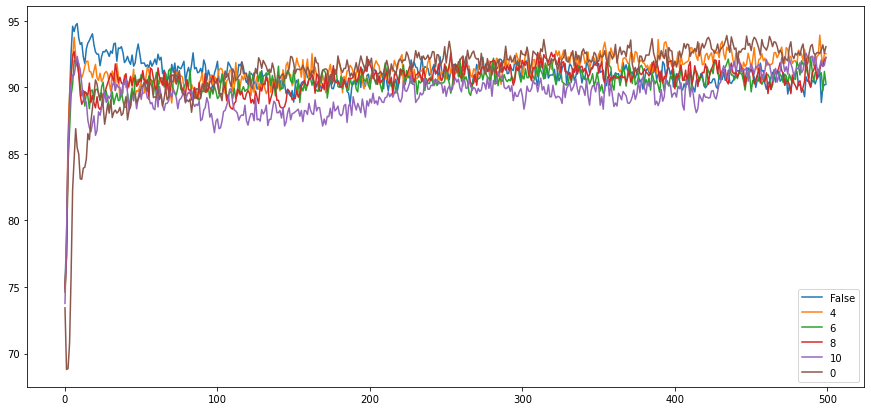

In [28]:
import os
import matplotlib.pyplot as plt

filedir = 'tests/initialv2'
div = {}

for filename in os.listdir(filedir):
    div_list = []
    with open(os.path.join(filedir, filename), 'r') as f:
        testfile = json.load(f)
        for test_result in testfile:
            diversity = map(lambda x: x["diversity"],test_result["iteration"])
            div_list.append(list(diversity))
    div[filename] = np.mean(np.array(div_list), axis=0)
plt.figure(figsize=figsize)
for key, means in div.items():
    plt.plot(means, label=key[:-5])
    
plt.legend()

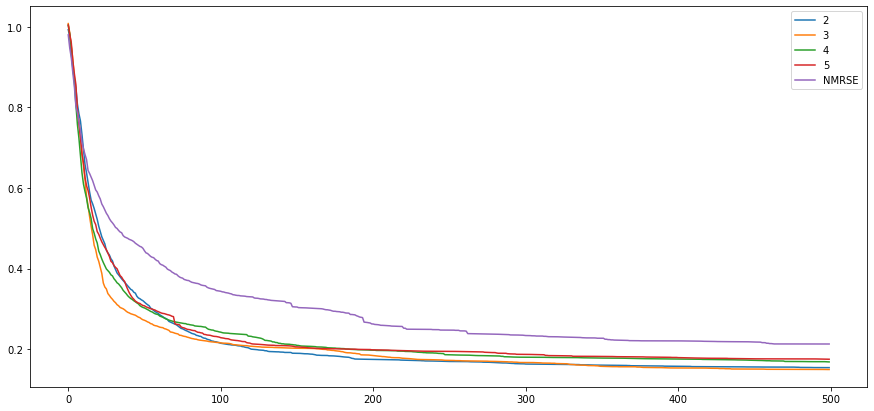

In [34]:
import os
import matplotlib.pyplot as plt

filedir = 'tests/phi'
div = {}

for filename in os.listdir(filedir):
    div_list = []
    with open(os.path.join(filedir, filename), 'r') as f:
        testfile = json.load(f)
        for test_result in testfile:
            diversity = map(lambda x: x["best"],test_result["iteration"])
            div_list.append(list(diversity))
    div[filename] = np.mean(np.array(div_list), axis=0)
plt.figure(figsize=figsize)
for key, means in div.items():
    plt.plot(means, label=key[:-5])
    
plt.legend()

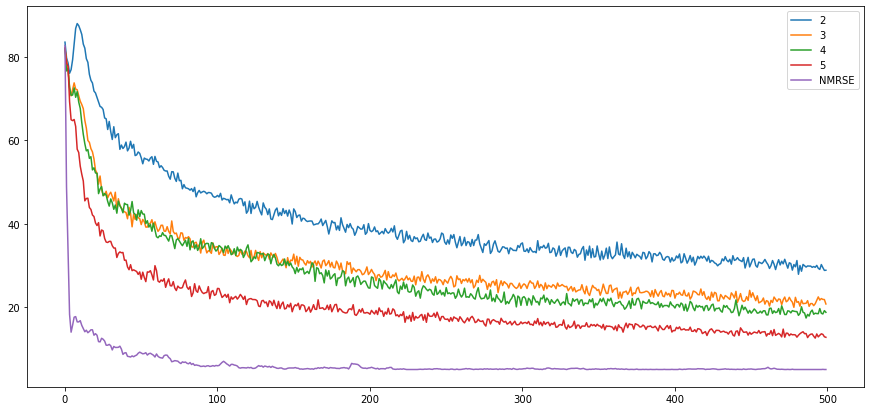

In [33]:
import os
import matplotlib.pyplot as plt

filedir = 'tests/phi'
div = {}

for filename in os.listdir(filedir):
    div_list = []
    with open(os.path.join(filedir, filename), 'r') as f:
        testfile = json.load(f)
        for test_result in testfile:
            diversity = map(lambda x: x["diversity"],test_result["iteration"])
            div_list.append(list(diversity))
    div[filename] = np.mean(np.array(div_list), axis=0)
plt.figure(figsize=figsize)
for key, means in div.items():
    plt.plot(means, label=key[:-5])
    
plt.legend()

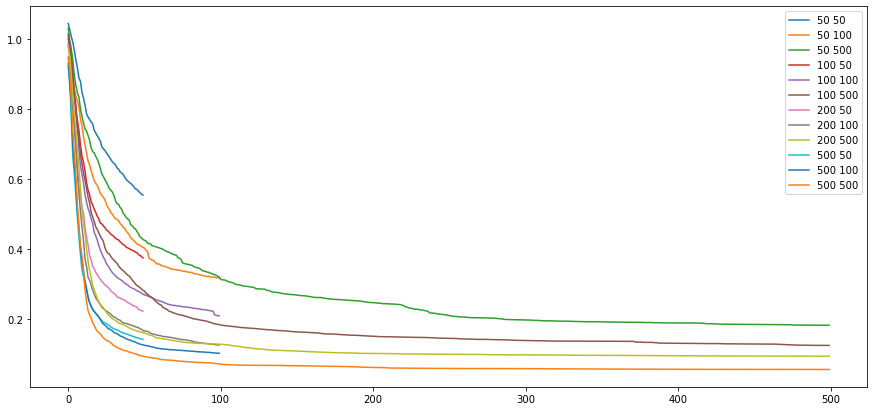

In [24]:
import os
import matplotlib.pyplot as plt

filedir = 'tests/popgen'
div = {}

for filename in os.listdir(filedir):
    div_list = []
    with open(os.path.join(filedir, filename), 'r') as f:
        testfile = json.load(f)
        for test_result in testfile:
            diversity = map(lambda x: x["best"],test_result["iteration"])
            div_list.append(list(diversity))
    div[filename] = np.mean(np.array(div_list), axis=0)
plt.figure(figsize=figsize)
for key, means in div.items():
    plt.plot(means, label=' '.join(key[:-5].split(sep="_")))

plt.legend()

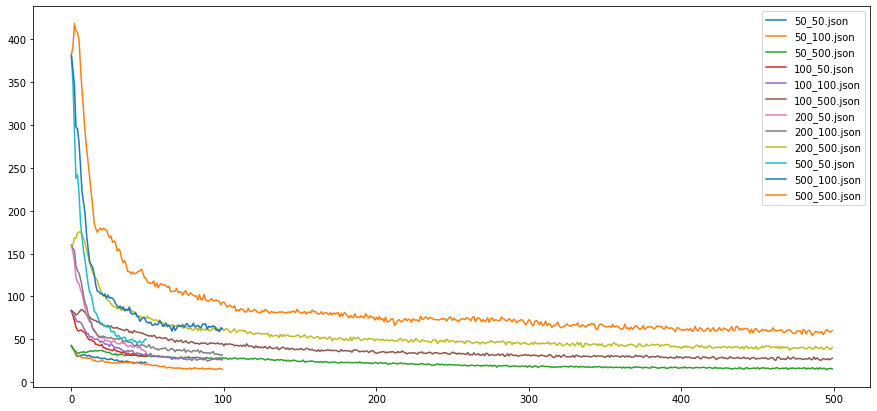

In [32]:
import os
import matplotlib.pyplot as plt

filedir = 'tests/popgen'
div = {}

for filename in os.listdir(filedir):
    div_list = []
    with open(os.path.join(filedir, filename), 'r') as f:
        testfile = json.load(f)
        for test_result in testfile:
            diversity = map(lambda x: x["diversity"],test_result["iteration"])
            div_list.append(list(diversity))
    div[filename] = np.mean(np.array(div_list), axis=0)
plt.figure(figsize=figsize)
for key, means in div.items():
    plt.plot(means, label=key)
    
plt.legend()

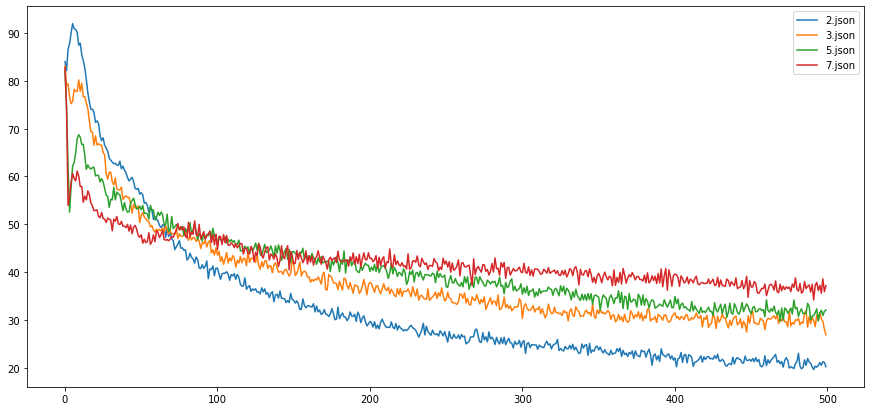

In [46]:
import os
import matplotlib.pyplot as plt

filedir = 'tests/tournament'
div = {}

for filename in os.listdir(filedir):
    div_list = []
    with open(os.path.join(filedir, filename), 'r') as f:
        testfile = json.load(f)
        for test_result in testfile:
            diversity = map(lambda x: x["diversity"],test_result["iteration"])
            div_list.append(list(diversity))
    div[filename] = np.mean(np.array(div_list), axis=0)
plt.figure(figsize=figsize)
for key, means in div.items():
    plt.plot(means, label=key)
    
plt.legend()

30
30


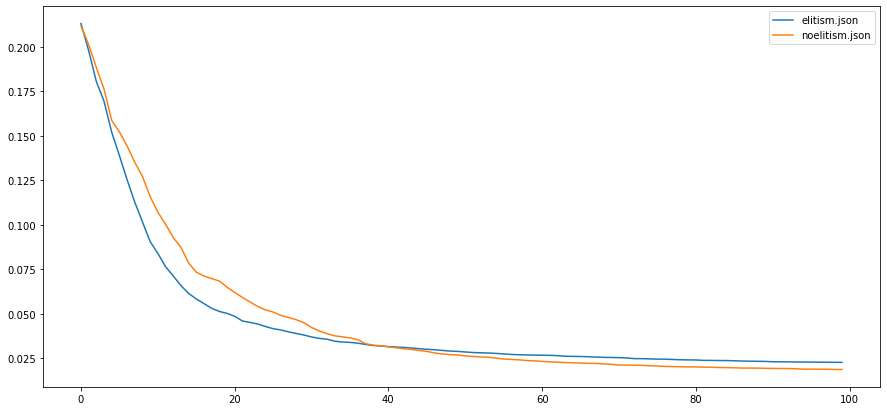

In [79]:
import os
import matplotlib.pyplot as plt

filedir = 'tests/elitism'
div = {}

for filename in os.listdir(filedir):
    div_list = []
    with open(os.path.join(filedir, filename), 'r') as f:
        testfile = json.load(f)
        for test_result in testfile:
            diversity = map(lambda x: x["best"],test_result["iteration"])
            div_list.append(list(diversity))
        print(len(div_list))
    div[filename] = np.mean(np.array(div_list), axis=0)
plt.figure(figsize=figsize)
for key, means in div.items():
    plt.plot(means, label=key)
    
plt.legend()

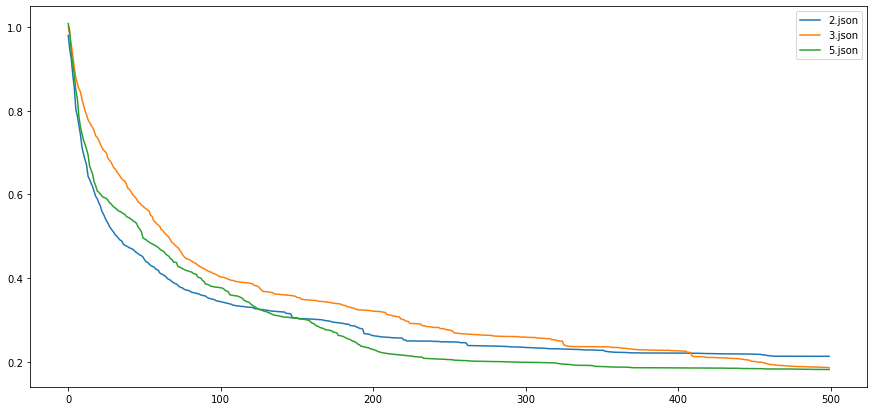

In [52]:
import os
import matplotlib.pyplot as plt

filedir = 'tests/tourn_phi=0'
div = {}

for filename in os.listdir(filedir):
    div_list = []
    with open(os.path.join(filedir, filename), 'r') as f:
        testfile = json.load(f)
        for test_result in testfile:
            diversity = map(lambda x: x["best"],test_result["iteration"])
            div_list.append(list(diversity))
    div[filename] = np.mean(np.array(div_list), axis=0)
plt.figure(figsize=figsize)
for key, means in div.items():
    plt.plot(means, label=key)
    
plt.legend()

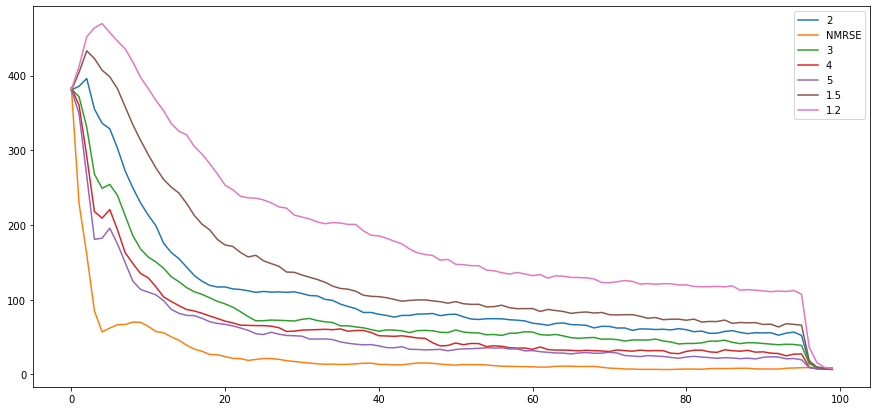

In [131]:
import os
import matplotlib.pyplot as plt

filedir = 'tests/phi'
div = {}

for filename in os.listdir(filedir):
    div_list = []
    with open(os.path.join(filedir, filename), 'r') as f:
        testfile = json.load(f)
        for test_result in testfile:
            diversity = map(lambda x: x["diversity"], test_result["iteration"])
            div_list.append(list(diversity))
    div[filename] = np.mean(np.array(div_list), axis=0)
plt.figure(figsize=figsize)
for key, means in div.items():
    plt.plot(means, label=key[:-5])
    
plt.legend()

In [61]:
import pandas as pd

In [164]:
with open("tests/final/synth1.json", "r") as f:
    results1 = json.load(f)

with open("tests/final/synth2.json", "r") as f:
    results2 = json.load(f)


with open("tests/final/concrete.json", "r") as f:
    results3 = json.load(f)

data = {}
data['Synth 1'] = []
data['Synth 2'] = []
data['Concrete'] = []
for experiment in results1:
    data['Synth 1'].append(experiment['iteration'][-1]['best'])

for experiment in results2:
    data['Synth 2'].append(experiment['iteration'][-1]['best'])

for experiment in results3:
    data['Concrete'].append(experiment['iteration'][-1]['best'])

df = pd.DataFrame(data)

pd.set_option('display.float_format', lambda x: '%.5f' % x)
a = df.describe(percentiles=[.5, .75, .95]).loc[['mean', 'std', 'min']].transpose()
b = df.describe(percentiles=[.5, .75, .95]).loc[['50%', '75%', '95%']].transpose()

In [165]:
print(a.style.to_latex())
print(b.style.to_latex())


\begin{tabular}{lrrr}
 & mean & std & min \\
Synth 1 & 0.014906 & 0.009255 & 0.000000 \\
Synth 2 & 0.204465 & 0.031793 & 0.120785 \\
Concrete & 1.166887 & 0.132183 & 0.914956 \\
\end{tabular}

\begin{tabular}{lrrr}
 & 50% & 75% & 95% \\
Synth 1 & 0.014360 & 0.022611 & 0.027911 \\
Synth 2 & 0.198443 & 0.226986 & 0.253099 \\
Concrete & 1.167574 & 1.258472 & 1.404362 \\
\end{tabular}



In [166]:
import json
import pandas as pd
data = {}
data['Synth 1'] = []
data['Synth 2'] = []
data['Concrete'] = []
with open("tests/final/synth1.json", "r") as f:
    results1 = json.load(f)

with open("tests/final/synth2.json", "r") as f:
    results2 = json.load(f)

with open("tests/final/concrete.json", "r") as f:
    results3 = json.load(f)



for experiment in results1:
    data['Synth 1'].append(experiment['iteration'][-1]['test'])

for experiment in results2:
    data['Synth 2'].append(experiment['iteration'][-1]['test'])

for experiment in results3:
    data['Concrete'].append(experiment['iteration'][-1]['test'])

df = pd.DataFrame(data)

pd.set_option('display.float_format', lambda x: '%.5f' % x)
a = df.describe(percentiles=[.5, .75, .95]).loc[['mean', 'std', 'min']].transpose()
b = df.describe(percentiles=[.5, .75, .95]).loc[['50%', '75%', '95%']].transpose()

In [167]:
print(a.style.to_latex())
print(b.style.to_latex())


\begin{tabular}{lrrr}
 & mean & std & min \\
Synth 1 & 0.115204 & 0.205079 & 0.000000 \\
Synth 2 & 1.231052 & 2.226418 & 0.246288 \\
Concrete & 0.581462 & 0.070561 & 0.447135 \\
\end{tabular}

\begin{tabular}{lrrr}
 & 50% & 75% & 95% \\
Synth 1 & 0.059018 & 0.142452 & 0.188007 \\
Synth 2 & 0.563888 & 0.623724 & 6.313074 \\
Concrete & 0.576918 & 0.620111 & 0.702474 \\
\end{tabular}



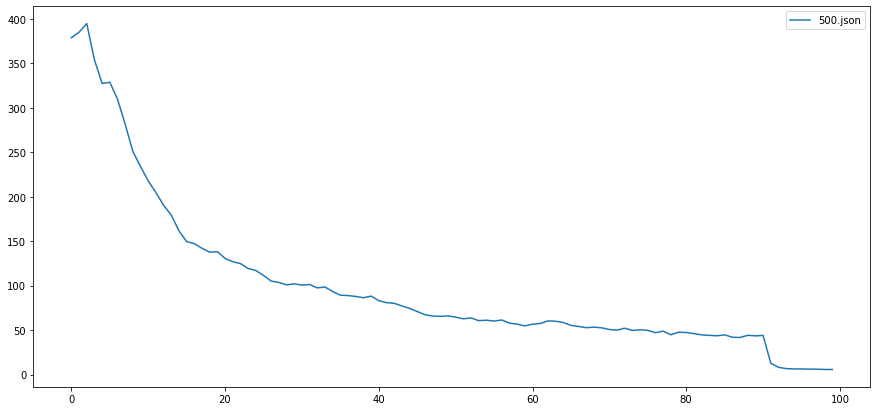

In [75]:
import os
import matplotlib.pyplot as plt

filedir = 'tests/turnoffphi'
div = {}

for filename in os.listdir(filedir):
    div_list = []
    with open(os.path.join(filedir, filename), 'r') as f:
        testfile = json.load(f)
        for test_result in testfile:
            diversity = map(lambda x: x["diversity"],test_result["iteration"])
            div_list.append(list(diversity))
    div[filename] = np.mean(np.array(div_list), axis=0)
plt.figure(figsize=figsize)
for key, means in div.items():
    plt.plot(means, label=key)
    
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


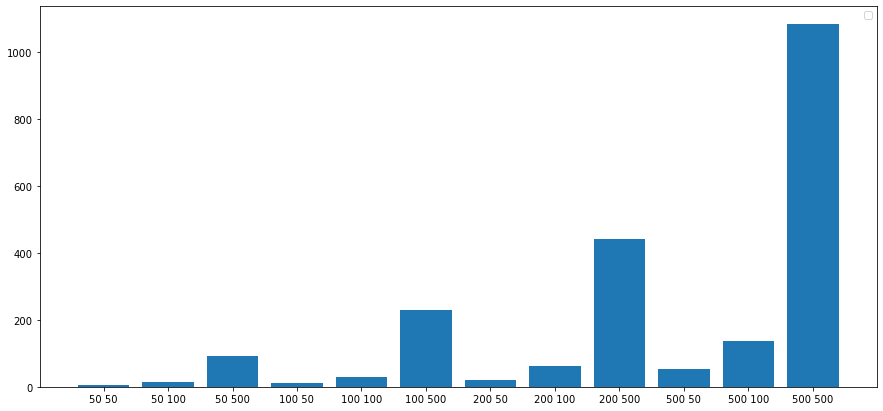

In [114]:
import os
import matplotlib.pyplot as plt

filedir = 'tests/times'
time = {}

for filename in os.listdir(filedir):
    div_list = []
    with open(os.path.join(filedir, filename), 'r') as f:
        testfile = float(f.read())
    time[filename] = testfile
plt.figure(figsize=figsize)

plt.bar(list(map(lambda x: ' '.join(x[:-5].split(sep="_")), time.keys())), height=time.values())
    
plt.legend()

In [161]:
import sympy as sym
from sympy.parsing.sympy_parser import parse_expr
from sympy.parsing.sympy_parser import standard_transformations, implicit_multiplication_application

transformations = (standard_transformations + (implicit_multiplication_application,))

expr = "(3 - a)*(3 - b) - sin((3 - a)*(3 - b))*sin(a + b - 3) + sin((3 - a)*(3 - b))*cos(a + b + sin(6)) + sin(cos(-a + b + cos(b)))"
expr = parse_expr(expr, transformations=transformations)
expr

(3 - a)*(3 - b) - sin((3 - a)*(3 - b))*sin(a + b - 3) + sin((3 - a)*(3 - b))*cos(a + b + sin(6)) + sin(cos(-a + b + cos(b)))

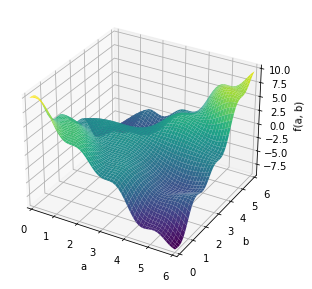

In [163]:
sym.plotting.plot3d(expr, (sym.Symbol('a'), 0, 6), (sym.Symbol('b'), 0, 6), backend="matplotlib", margin=0.01)